# Fit Pseudo2D data to get relaxation quantities
We demo the usage of relaxationFit using our generated demo pseudo2d NMR data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import scipy.interpolate
from scipy.optimize import curve_fit
from fit_relaxations import t1_buildup, t1rho_buildup, t2_buildup, fit_all_peaks, plot_all_fittings

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## The demo data is a T<sub>2</sub> pseudo2D experiment. 
T<sub>1</sub> and T<sub>1$\rho$</sub> are of very similar concepts.

In [2]:
data = np.loadtxt('demo2D.txt')
data.shape
df = pd.DataFrame(data.T, columns=[str(i) for i in range(60)])

# However, for nmrpipe generated ascii files, the data is normally in the order below:
df_columns = []
for i in df.columns:
    c = pd.DataFrame(df[str(i)])
    c.columns = ['val']
    c['y'] = int(i) + 1
    df_columns.append(c)

df_nmrpipe = pd.concat(df_columns)

Before any decays, the spectrum would have the highest intensity. This corresponds to the first out of 60 slices for the 2d spectrum. From this slice we can predict peak positions.

In [3]:
slice_one = df_nmrpipe[df_nmrpipe['y']==1]

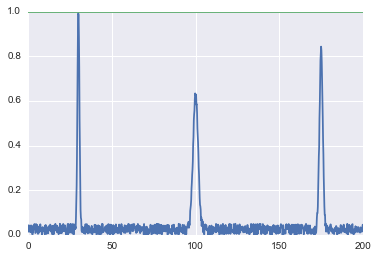

In [4]:
xx = np.linspace(0,200,1024)
plt.plot(xx,slice_one)
plt.show()

## Estimate peak positions

In [5]:
import peakutils
from peakutils.plot import plot as pplot

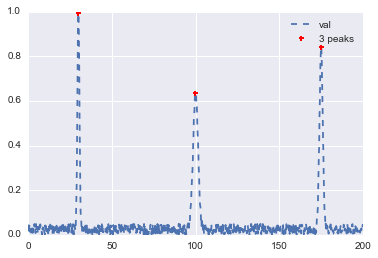

In [6]:
peak_pos = peakutils.indexes(slice_one['val'], thres=0.2, min_dist=10)
pplot(xx,slice_one['val'],peak_pos)
plt.show()

In [7]:
print(peak_pos)  # This is estimated peak positions


# The corresponding chemical shifts at each index
peaks_x = peakutils.interpolate(xx, slice_one['val'], ind=peak_pos)
print("Chemical shifts at each peak position (ppm): %s" % peaks_x)  

[153 510 895]
Chemical shifts at each peak position (ppm): [  30.00015425  100.00202714  174.98283501]


However in peakutils module, index starts from one, whereas in numpy, index starts from zero, the index in numpy array should be adjusted by one:

In [8]:
peak_pos = peak_pos + 1

In [9]:
peaks = []
for p in peak_pos:
    peak = df_nmrpipe.loc[p,:]
    peaks.append(peak)

## list `peaks` contain buildup curves for three peaks.

In [10]:
decays = np.arange(0,300,5) # decays in miliseconds

In [11]:
params = fit_all_peaks(t2_buildup, decays, peaks)

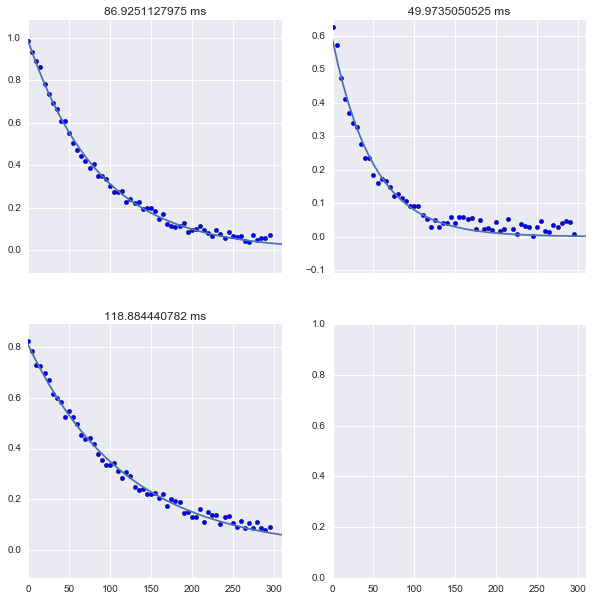

In [13]:
%matplotlib inline
plot_all_fittings(t2_buildup,decays,peaks,params,titleunit="ms",figsize=(10,10),
                  figname="T2s_demo.pdf",savefig=False,xrange=[0,310])

The estimated T2 times are predicted as the title for each plot.
(_They were stored in the **params** variable above._)